In [40]:
import numpy as np
import pandas as pd
import os 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

#*********this section is for the checking of efficient clustering methods **********************
#*************All these clustering method are explained in the report *********************

In [41]:
dir_list=sorted(os.listdir("/home/ritam/ontology_hardness/dataset"))
                            # give the path of the directory where all files with computed, reasoning tasks time
                            # and memory consumption
                            # this 'dir_list' contains file names in this directory but some files are in the 
                            # format like '.~lock.file_58.csv#' which needs to be get rid off

print(dir_list) 

['file_1.csv', 'file_10.csv', 'file_11.csv', 'file_12.csv', 'file_13.csv', 'file_14.csv', 'file_15.csv', 'file_16.csv', 'file_17.csv', 'file_18.csv', 'file_19.csv', 'file_2.csv', 'file_20.csv', 'file_21.csv', 'file_22.csv', 'file_23.csv', 'file_24.csv', 'file_25.csv', 'file_26.csv', 'file_27.csv', 'file_28.csv', 'file_29.csv', 'file_3.csv', 'file_30.csv', 'file_31.csv', 'file_32.csv', 'file_33.csv', 'file_34.csv', 'file_35.csv', 'file_36.csv', 'file_37.csv', 'file_38.csv', 'file_39.csv', 'file_4.csv', 'file_40.csv', 'file_41.csv', 'file_42.csv', 'file_43.csv', 'file_44.csv', 'file_45.csv', 'file_46.csv', 'file_47.csv', 'file_48.csv', 'file_49.csv', 'file_5.csv', 'file_50.csv', 'file_51.csv', 'file_52.csv', 'file_53.csv', 'file_54.csv', 'file_55.csv', 'file_56.csv', 'file_57.csv', 'file_58.csv', 'file_59.csv', 'file_6.csv', 'file_7.csv', 'file_8.csv', 'file_9.csv']


In [42]:
l=0
final_df=pd.DataFrame(columns=['size_kb', 'consistency_time_milsecs', 'consistency_size_kb',
       'realisation_time_milsecs', 'realisation_size_kb',
       'classification_time_milsecs', 'classification_size_kb'])

full_dataframe = pd.DataFrame(columns=['file','size_kb', 'consistency_time_milsecs', 'consistency_size_kb',
       'realisation_time_milsecs', 'realisation_size_kb',
       'classification_time_milsecs', 'classification_size_kb'])


for i in range(len(dir_list)):
    if dir_list[i][0]=='f': # considering files int the correct format
        x=dir_list[i]
        
        path="/home/ritam/ontology_hardness/dataset/"+x
        z=pd.read_csv(path)
        z_drop=z.drop(['file'],axis=1)
        final_df=pd.concat([final_df,z_drop])
        
        full_dataframe=pd.concat([full_dataframe,z])
        
print("total ontologies with reasoning tasks , time and memory consumption")
print(full_dataframe.shape) # contains all the ontologies (only consistent) with file name, size and 6 
                            # feature values
print(final_df.shape) # same as full_dataframe but donot contains the file name , rest are same
full_dataframe


total ontologies with reasoning tasks , time and memory consumption
(16434, 8)
(16434, 7)


file size_kb  \
0    0000212a-38bc-4129-898f-70d1e9114863_Lion_Bar....      95   
1                             00006.owl_functional.owl     425   
2                             00008.owl_functional.owl     130   
3                             00011.owl_functional.owl      77   
4                             00012.owl_functional.owl      99   
..                                                 ...     ...   
290  444a3020-7ef8-4893-aa7f-d555311a37bb_ysfunctio...     151   
291  444cb459-2fa5-4e39-88a4-3f48286bf7ff_sioc.rdf_...      31   
292  44554ad1-5e09-4f62-b55e-1a566d4310a3_Sardine.r...      95   
293  445e2e48-85ed-44f6-a0b9-8b43b9d81c3e_Khoa.rdf_...      95   
294  44618447-fec3-4019-a114-7d8f756d0db3_Provenanc...     243   

    consistency_time_milsecs consistency_size_kb realisation_time_milsecs  \
0                         27               16240                       28   
1                         51               17836                       75   
2                         43               19856                       43   
3                         26               15720                       33   
4                         30               16024                       34   
..                       ...                 ...                      ...   
290                       24               15596                       30   
291                       23               15288                       25   
292                       30               16148                       31   
293                       30               16236                       31   
294                       49               19596                       55   

    realisation_size_kb classification_time_milsecs classification_size_kb  
0                 17252                          27                  16976  
1                 22824                          61                  22320  
2                 21168                          45                  20884  
3                 17916                          33                  17992  
4                 17688                          32                  17696  
..                  ...                         ...                    ...  
290               17100                          31                  16732  
291               15628                          21                  15376  
292               17088                          29                  16888  
293               17296                          28                  16952  
294               21640                          52                  20880  

[16434 rows x 8 columns]

In [43]:
#use of minmax scalar to scale the dataframe 'final_df' , so that every feature values comes in 0 to 1
#this makes every feature to be in same scale
final_np=np.array(final_df)
scaler = MinMaxScaler()
scaler.fit(final_df)
final_df_scaled=scaler.transform(final_df)
#print(final_df_scaled)
df_MinMax = pd.DataFrame(data=final_df_scaled, columns=['size_kb', 'consistency_time_milsecs', 'consistency_size_kb',
       'realisation_time_milsecs', 'realisation_size_kb',
       'classification_time_milsecs', 'classification_size_kb'])
df_MinMax  # this dataframe contains the scaled version of 'final_df'

size_kb  consistency_time_milsecs  consistency_size_kb  \
0      0.000049              6.481351e-07             0.000013   
1      0.000248              1.759224e-06             0.000026   
2      0.000070              1.388861e-06             0.000041   
3      0.000038              6.018397e-07             0.000009   
4      0.000051              7.870212e-07             0.000012   
...         ...                       ...                  ...   
16429  0.000083              5.092490e-07             0.000008   
16430  0.000010              4.629536e-07             0.000006   
16431  0.000049              7.870212e-07             0.000013   
16432  0.000049              7.870212e-07             0.000013   
16433  0.000138              1.666633e-06             0.000039   

       realisation_time_milsecs  realisation_size_kb  \
0                  5.092071e-07             0.000017   
1                  2.684910e-06             0.000060   
2                  1.203580e-06             0.000047   
3                  7.406649e-07             0.000022   
4                  7.869564e-07             0.000020   
...                         ...                  ...   
16429              6.017902e-07             0.000016   
16430              3.703324e-07             0.000004   
16431              6.480818e-07             0.000016   
16432              6.480818e-07             0.000017   
16433              1.759079e-06             0.000051   

       classification_time_milsecs  classification_size_kb  
0                     5.091955e-07                0.000015  
1                     2.083073e-06                0.000057  
2                     1.342425e-06                0.000046  
3                     7.869386e-07                0.000023  
4                     7.406481e-07                0.000021  
...                            ...                     ...  
16429                 6.943576e-07                0.000013  
16430                 2.314525e-07                0.000003  
16431                 6.017765e-07                0.000015  
16432                 5.554860e-07                0.000015  
16433                 1.666458e-06                0.000046  

[16434 rows x 7 columns]

In [44]:
# We have taken a subset of 16433 ontologies to work with. This is an option provided to take any subset 
# to work with, further downwards

#'partial_dataframe' contains the subset of 'full_dataframe'. This 'partial_dataframe' is used in further 
# processing 

partial_dataframe=full_dataframe.iloc[0:16433,:]  # 'partial_dataframe' contains non scaled values
print(partial_dataframe.shape)

t=df_MinMax.head(16433)  # dataframe 't' contains scaled values and a subset of 'df_MinMax'
print(t.shape)

# this subset value should be same for both cases

(16433, 8)
(16433, 7)


KMeans(n_clusters=3, random_state=0)
[0 0 0 ... 0 0 0] 118


<ipython-input-45-9fe81020f63d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['cluster']=y_predicted


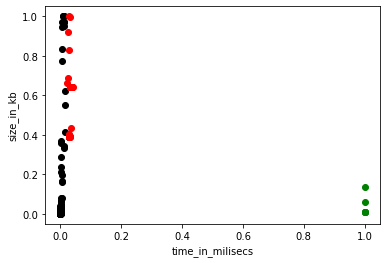

In [45]:
# K-means clustering based on time into easy, medium and hard category , we get 3 categories
# this is the first clustering.

#*****  checking  the first clustering method**************

km = KMeans(n_clusters=3,random_state=0)
print(km)

y_predicted=km.fit_predict(t[["consistency_time_milsecs"]]) # first clustered on 'consistency_time_milsecs'
print(y_predicted,np.sum(y_predicted)) # contains the predicted classes
t['cluster']=y_predicted

t1=t[t['cluster']==0] # contains the class 0
t2=t[t['cluster']==1] # contains the class 1
t3=t[t['cluster']==2] # contains the class 2 

plt.scatter(t1["consistency_time_milsecs"],t1["consistency_size_kb"],c='black') # class 0 is labelled as black
plt.scatter(t2["consistency_time_milsecs"],t2["consistency_size_kb"],c='green') # class 1 is labelled as green
plt.scatter(t3["consistency_time_milsecs"],t3["consistency_size_kb"],c='red')   # class 2 is labelled as red
plt.xlabel('time_in_milisecs')
plt.ylabel('size_in_kb')
plt.show()


In [46]:
label_col=[]
for i in range((y_predicted.shape[0])):
    if y_predicted[i]==0:
        label_col.append('easy') # black label
    elif y_predicted[i]==1:
        label_col.append('hard') # green label
    else:
        label_col.append('medium') # red label
        
partial_dataframe['label_time']=label_col #partial dataframe has label for each of the ontology


<ipython-input-46-bd33910caf59>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_dataframe['label_time']=label_col #partial dataframe has label for each of the ontology


In [47]:
# this section tells after K-means clustering how many ontologies are in easy, medium and hard category

# collect the easy , medium and hard ones based on time

df_easy=partial_dataframe[partial_dataframe['label_time']=='easy']
df_medium=partial_dataframe[partial_dataframe['label_time']=='medium']
df_hard=partial_dataframe[partial_dataframe['label_time']=='hard']
print("Maximum value of consistency time in easy time category= ",df_easy['consistency_time_milsecs'].max(),"Minimum value of consistency time in easy time category= ",df_easy['consistency_time_milsecs'].min())
print("Shape of easy time category= ",df_easy.shape)

print("Maximum value of consistency time in medium time category= ",df_medium['consistency_time_milsecs'].max(),"Minimum value of consistency time in medium time category= ",df_medium['consistency_time_milsecs'].min())
print("Shape of medium time category= ",df_medium.shape)

print("Maximum value of consistency time in hard time category= ",df_hard['consistency_time_milsecs'].max(),"Minimum value of consistency time in hard time category= ",df_hard['consistency_time_milsecs'].min())
print("Shape of hard time category= ",df_hard.shape)

#********************** end of K means clustering *******************************************

Maximum value of consistency time in easy time category=  308466 Minimum value of consistency time in easy time category=  13
Shape of easy time category=  (16371, 9)
Maximum value of consistency time in medium time category=  898338 Minimum value of consistency time in medium time category=  500321
Shape of medium time category=  (56, 9)
Maximum value of consistency time in hard time category=  21600449 Minimum value of consistency time in hard time category=  21600051
Shape of hard time category=  (6, 9)


In [48]:
# ********** now checking the second clustering method **********************#
#**********************BIRCH clustering ***********************************

partial_dataframe=full_dataframe.iloc[0:16433,:]  # contains non scaled values
print(partial_dataframe.shape)
t=df_MinMax.head(16433)  # contains scaled values
print(t.shape)



(16433, 8)
(16433, 7)


[0 0 0 ... 0 0 0]


/home/ritam/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_birch.py:647: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (3). Decrease the threshold.
  warnings.warn(
<ipython-input-49-f5a5d404f823>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['cluster']=y_predicted


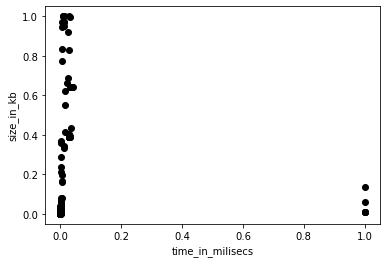

In [49]:
# cluster based on time  into easy, medium and hard

from sklearn.cluster import Birch

brc = Birch(branching_factor=50, n_clusters=3, threshold=10) 

y_predicted=brc.fit_predict(t[["consistency_time_milsecs"]])
print(y_predicted)
t['cluster']=y_predicted
t1=t[t['cluster']==0] 
t2=t[t['cluster']==1] 
t3=t[t['cluster']==2]  

plt.scatter(t1["consistency_time_milsecs"],t1["consistency_size_kb"],c='black')
plt.scatter(t2["consistency_time_milsecs"],t2["consistency_size_kb"],c='green')
plt.scatter(t3["consistency_time_milsecs"],t3["consistency_size_kb"],c='red')
plt.xlabel('time_in_milisecs')
plt.ylabel('size_in_kb')
plt.show()


In [50]:
# we can see there is no proper clustering happening for different parameters , just representing one class

label_col=[]
for i in range((y_predicted.shape[0])):
    if y_predicted[i]==0:
        label_col.append('easy') 
    elif y_predicted[i]==1:                           # we cannot group them into different classes, lets assume
        label_col.append('hard')                      # all are in easy time category
    else:
        label_col.append('medium')
        
partial_dataframe['label_time']=label_col


<ipython-input-50-1ffad2d029d6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_dataframe['label_time']=label_col


In [51]:
# this section tells after BIRCH clustering how many ontologies are in easy, medium and hard category

# collect the easy , medium and hard ones based on time
# we can see there are no ontologies in medium and hard category , since I assumed all ontologies to be one class
# because BIRCH clustering doesnot give proper grouping results

df_easy=partial_dataframe[partial_dataframe['label_time']=='easy']
df_medium=partial_dataframe[partial_dataframe['label_time']=='medium']
df_hard=partial_dataframe[partial_dataframe['label_time']=='hard']
print("Maximum value of consistency time in easy time category= ",df_easy['consistency_time_milsecs'].max(),"Minimum value of consistency time in easy time category= ",df_easy['consistency_time_milsecs'].min())
print("Shape of easy time category= ",df_easy.shape)

print("Maximum value of consistency time in medium time category= ",df_medium['consistency_time_milsecs'].max(),"Minimum value of consistency time in medium time category= ",df_medium['consistency_time_milsecs'].min())
print("Shape of medium time category= ",df_medium.shape)

print("Maximum value of consistency time in hard time category= ",df_hard['consistency_time_milsecs'].max(),"Minimum value of consistency time in hard time category= ",df_hard['consistency_time_milsecs'].min())
print("Shape of hard time category= ",df_hard.shape)

#************this ends BIRCH CLUSTERING *************************

Maximum value of consistency time in easy time category=  21600449 Minimum value of consistency time in easy time category=  13
Shape of easy time category=  (16433, 9)
Maximum value of consistency time in medium time category=  nan Minimum value of consistency time in medium time category=  nan
Shape of medium time category=  (0, 9)
Maximum value of consistency time in hard time category=  nan Minimum value of consistency time in hard time category=  nan
Shape of hard time category=  (0, 9)


In [52]:
#************* now checking the third clustering method ********************

# *********************** DBSCAN clustering method**********

partial_dataframe=full_dataframe.iloc[0:16433,:]  # contains non scaled values
print(partial_dataframe.shape)
t=df_MinMax.head(16433)  # contains scaled values
print(t.shape)



(16433, 8)
(16433, 7)


[0 0 0 ... 0 0 0] 6


<ipython-input-53-2a0f06ae55b7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['cluster']=y_predicted


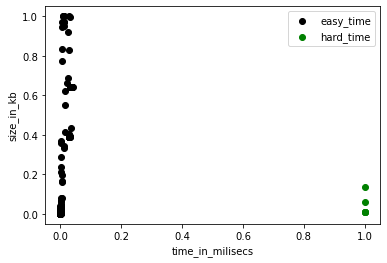

In [53]:
# cluster based on time  into easy, medium and hard

from sklearn.cluster import DBSCAN # density based clustering

brc = DBSCAN(eps = 0.02, min_samples = 5)
y_predicted=brc.fit_predict(t[["consistency_time_milsecs"]])
print(y_predicted, np.sum(y_predicted))
t['cluster']=y_predicted

t1=t[t['cluster']==0] # contains class 0
t2=t[t['cluster']==1] # contains class 1
t3=t[t['cluster']==2] # class 2 is not present 

plt.scatter(t1["consistency_time_milsecs"],t1["consistency_size_kb"],c='black',label='easy_time')
plt.scatter(t2["consistency_time_milsecs"],t2["consistency_size_kb"],c='green',label='hard_time')
plt.scatter(t3["consistency_time_milsecs"],t3["consistency_size_kb"],c='red')
plt.xlabel('time_in_milisecs')
plt.ylabel('size_in_kb')
plt.legend()
plt.show()


In [54]:
# this only gives two classes after clustering, which is easy and hard. There is no medium class. So this 
# is not a proper clustering method since we dont get 3 clustering classes

label_col=[]
for i in range((y_predicted.shape[0])):
    if y_predicted[i]==0:
        label_col.append('easy')  # contains easy class           # we consider two classes are easy and hard time 
    elif y_predicted[i]==1:
        label_col.append('hard')  # contains hard class
    else:
        label_col.append('medium') # no medium class 
        
partial_dataframe['label_time']=label_col


<ipython-input-54-44a443e3bbc0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_dataframe['label_time']=label_col


In [55]:
# this section tells after DBSCAN clustering how many ontologies are in easy, medium and hard category

# collect the easy , medium and hard ones based on time

df_easy=partial_dataframe[partial_dataframe['label_time']=='easy']
df_medium=partial_dataframe[partial_dataframe['label_time']=='medium']
df_hard=partial_dataframe[partial_dataframe['label_time']=='hard']
print("Maximum value of consistency time in easy time category= ",df_easy['consistency_time_milsecs'].max(),"Minimum value of consistency time in easy time category= ",df_easy['consistency_time_milsecs'].min())
print("Shape of easy time category= ",df_easy.shape)

print("Maximum value of consistency time in medium time category= ",df_medium['consistency_time_milsecs'].max(),"Minimum value of consistency time in medium time category= ",df_medium['consistency_time_milsecs'].min())
print("Shape of medium time category= ",df_medium.shape)

print("Maximum value of consistency time in hard time category= ",df_hard['consistency_time_milsecs'].max(),"Minimum value of consistency time in hard time category= ",df_hard['consistency_time_milsecs'].min())
print("Shape of hard time category= ",df_hard.shape)

#**************** this ends DBSCAN clustering algorithm*********************

Maximum value of consistency time in easy time category=  898338 Minimum value of consistency time in easy time category=  13
Shape of easy time category=  (16427, 9)
Maximum value of consistency time in medium time category=  nan Minimum value of consistency time in medium time category=  nan
Shape of medium time category=  (0, 9)
Maximum value of consistency time in hard time category=  21600449 Minimum value of consistency time in hard time category=  21600051
Shape of hard time category=  (6, 9)


In [56]:
#************** now checking the fourth clustering ********************

#*********  Agglomerative Clustering Method ******************

partial_dataframe=full_dataframe.iloc[0:16433,:]  # contains non scaled values
print(partial_dataframe.shape)
t=df_MinMax.head(16433)  # contains scaled values
print(t.shape)



(16433, 8)
(16433, 7)


[0 0 0 ... 0 0 0] 118


<ipython-input-57-a1670e48e904>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['cluster']=y_predicted


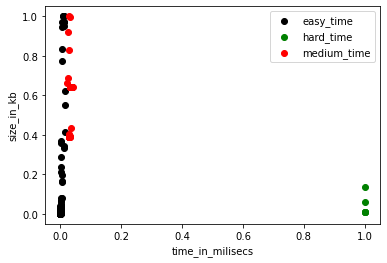

In [57]:
# cluster based on time  into easy, medium and hard

from sklearn.cluster import AgglomerativeClustering # hierachical based clustering


agm = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_predicted=agm.fit_predict(t[["consistency_time_milsecs"]])
print(y_predicted, np.sum(y_predicted))
t['cluster']=y_predicted

t1=t[t['cluster']==0]  # contains class 0
t2=t[t['cluster']==1]  # contains class 1
t3=t[t['cluster']==2]  # contains class 2

plt.scatter(t1["consistency_time_milsecs"],t1["consistency_size_kb"],c='black',label='easy_time')
plt.scatter(t2["consistency_time_milsecs"],t2["consistency_size_kb"],c='green',label='hard_time')
plt.scatter(t3["consistency_time_milsecs"],t3["consistency_size_kb"],c='red',label='medium_time')
plt.xlabel('time_in_milisecs')
plt.ylabel('size_in_kb')
plt.legend()
plt.show()


In [58]:
# here we get 3 desired clusters easy, medium and hard time , same as K-means clustering 

label_col=[]
for i in range((y_predicted.shape[0])):
    if y_predicted[i]==0:
        label_col.append('easy')   # easy class
    elif y_predicted[i]==1:
        label_col.append('hard')   # hard class
    else:
        label_col.append('medium') # medium class
        
partial_dataframe['label_time']=label_col


<ipython-input-58-20568c7484ec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_dataframe['label_time']=label_col


In [59]:
# this section tells after Agglomerative clustering how many ontologies are in easy, medium and hard category

# collect the easy , medium and hard ones based on time

df_easy=partial_dataframe[partial_dataframe['label_time']=='easy']
df_medium=partial_dataframe[partial_dataframe['label_time']=='medium']
df_hard=partial_dataframe[partial_dataframe['label_time']=='hard']
print("Maximum value of consistency time in easy time category= ",df_easy['consistency_time_milsecs'].max(),"Minimum value of consistency time in easy time category= ",df_easy['consistency_time_milsecs'].min())
print("Shape of easy time category= ",df_easy.shape)

print("Maximum value of consistency time in medium time category= ",df_medium['consistency_time_milsecs'].max(),"Minimum value of consistency time in medium time category= ",df_medium['consistency_time_milsecs'].min())
print("Shape of medium time category= ",df_medium.shape)

print("Maximum value of consistency time in hard time category= ",df_hard['consistency_time_milsecs'].max(),"Minimum value of consistency time in hard time category= ",df_hard['consistency_time_milsecs'].min())
print("Shape of hard time category= ",df_hard.shape)
 
# ************ this ends Agglomerative clustering method ********************

Maximum value of consistency time in easy time category=  308466 Minimum value of consistency time in easy time category=  13
Shape of easy time category=  (16371, 9)
Maximum value of consistency time in medium time category=  898338 Minimum value of consistency time in medium time category=  500321
Shape of medium time category=  (56, 9)
Maximum value of consistency time in hard time category=  21600449 Minimum value of consistency time in hard time category=  21600051
Shape of hard time category=  (6, 9)


In [60]:
# so we have K means clustering and Agglomerative clustering working good. But we choose K means to work with 
# because Agglomerative donot works good for larger dataset, also processing is slow.